In [1]:
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
data = pd.read_csv("MicrochipData.csv")
data = shuffle(data)
data.head()

,test1,test2,result
6,-0.398040,0.034357,1
99,0.823160,0.663010,0
81,-0.133060,-0.448100,0
68,0.938360,0.012427,0
95,-0.081221,1.108900,0


In [3]:
X = data.iloc[: , : 2]
Y = data.iloc[: , 2:]
Xadd1 = X["test1"]**2
Xadd2 = X["test2"]**2
X.insert(2 , "t1" , Xadd1)
X.insert(3 , "t2" , Xadd2)
x_train = X.iloc[:int(X.shape[0] * .7) , :]
y_train = Y.iloc[:int(Y.shape[0] * .7) , :]
x_test = X.iloc[int(X.shape[0] * .7): , :]
y_test = Y.iloc[int(Y.shape[0] * .7): , :]
x_axis = []
y_axis = []
intercept = np.ones((x_train.shape[0], 1))
x_train = np.concatenate((intercept, x_train), axis=1)
intercept = np.ones((x_test.shape[0], 1))
x_test = np.concatenate((intercept, x_test), axis=1)
theta = np.zeros((x_train.shape[1] , 1))
lambdda = 0

In [4]:
theta = np.zeros((x_train.shape[1] , 1))
lambdda = 0

In [5]:
def gradient_descent(X, y, h):
    return (np.dot(X.T, (h - y))) / y.shape[0]
def sigmoid(X, weight):
    z = np.dot(X, weight)
    return 1 / (1 + np.exp(-z))
def find_hessian(h , X  , Y):
    Hess = np.zeros(shape = (5 , 5))
    for i in range (X.shape[0]):
        hess = np.matmul(x_train[i:i+1, :].T , x_train[i:i+1 , :])
        hess = hess*(h[i])*(1-h[i])
        Hess += hess
    return Hess

In [6]:
epochs = 100
for i in range(epochs):
    h = sigmoid(x_train, theta)
    loss = (h - y_train)**2
    x_axis.append(i)
    y_axis.append(np.average(loss))
    f1 = gradient_descent(x_train , y_train , h)
    f2 = find_hessian(h , x_train , y_train)
    theta -= np.dot(f1.T , np.linalg.pinv(f2)).T
    theta.shape

In [7]:
result = sigmoid(x_test , theta)
c = 0
y_test = y_test.values

In [8]:
for i in range(x_test.shape[0]):
    if(round(float(result[i])) == float(y_test[i])):
        c += 1

In [9]:
accuracy = c/y_test.shape[0]
print("accuracy:" , accuracy * 100)

accuracy: 80.55555555555556


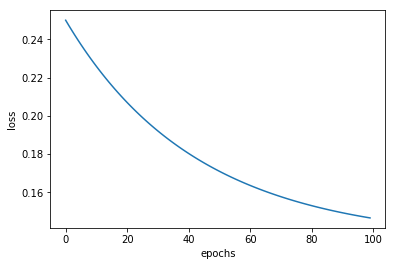

In [10]:
plt.plot(x_axis , y_axis)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [11]:
theta
w = theta.flatten()
xx1 = []
yy1 = []
xx2 = []
yy2 = []

In [12]:
xx = np.linspace(-1 , 1 , 1000)
def calc(x):
    D = w[2]**2 - 4 * w[4] * (w[0] + w[1]*x + w[3]*(x**2))
    if D >= 0:
        s1 = (-w[2] + np.sqrt(D))/(2*w[4])
        s2 = (-w[2] - np.sqrt(D))/(2*w[4])
        xx1.append(x)
        yy1.append(s1)
        xx2.append(x)
        yy2.append(s2)
for i in xx:
    calc(i)

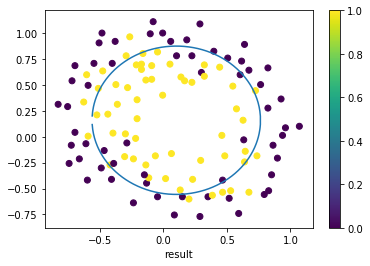

In [13]:
plt.xlabel(data.columns[2])
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=Y.iloc[:,0])
plt.colorbar()
xx1 = np.append(xx1 , np.flip(xx2))
yy1 = np.append(yy1 , np.flip(yy2))

plt.plot(xx1 , yy1)